In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('fetal_health.csv')
df

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,7.2,40,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,7.1,66,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,6.1,67,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,7.0,66,103,169,6,0,152,147,151,4,1,2


In [3]:
df.shape

(2126, 22)

*   There are 2126 observations and 22 features in this dataset.
*   One is a dependent variable, whereas the others are independent variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

*   The data contains float and int values.
*   There are no null/missing values in any column.

In [5]:
df.describe()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


*   Except for abnormal short term variability, histogram mode, histogram mean, histogram median, each column's mean value is **greater than** its median value.
*   These following features: "accelerations," "fetal movement," "light decelerations," "mean value of short term variability," "percentage of time with abnormal long term variability," "mean value of long term variability," "histogram number of peaks," "histogram number of zeroes," and "histogram variance  have a **significant gap** between the 75th percentile and the maximum value."


The reason mentioned above indicates that the data collection contains extreme values-outliers.


In [6]:
df.fetal_health.unique()

array([2, 1, 3])

*   The target is a categorical and discrete variable.
*   The **fetal_health** score scale ranges from 1 to 3 (discrete) : where 1 = normal, 2 = suspect and 3 = pathological.

In [7]:
df.fetal_health.value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

The majority of the values in fetal health are located in the 1st category, while there were just a few data for the other categories.


In [8]:
df['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [9]:
df.loc[df['severe_decelerations']==0.001]

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1488,132,0.002,0.000,0.008,0.000,0.001,0.001,31,1.4,0,11.5,102,61,163,5,0,99,121,129,94,1,1
1489,132,0.000,0.000,0.006,0.000,0.001,0.001,32,1.3,0,13.6,91,60,151,1,1,99,116,125,72,1,3
1791,121,0.000,0.001,0.004,0.010,0.001,0.000,66,2.1,0,6.4,105,55,160,7,0,67,85,92,109,-1,3
1792,121,0.000,0.001,0.003,0.011,0.001,0.000,67,2.1,0,0.0,102,55,157,4,1,67,81,87,89,-1,3
1793,121,0.000,0.001,0.005,0.012,0.001,0.000,66,2.1,0,0.0,102,55,157,5,1,67,83,90,98,-1,3
1794,121,0.000,0.001,0.003,0.010,0.001,0.000,68,2.1,0,0.0,102,55,157,3,1,67,79,82,83,-1,3
1795,121,0.000,0.000,0.004,0.009,0.001,0.000,70,1.9,0,0.0,102,55,157,6,2,67,76,79,68,-1,3


From the above table, it can be implied that severe decelerations can be an identifier of the 3rd type of fetal health (pathological).

In [10]:
# find correlated variables.
corr = df.corr()

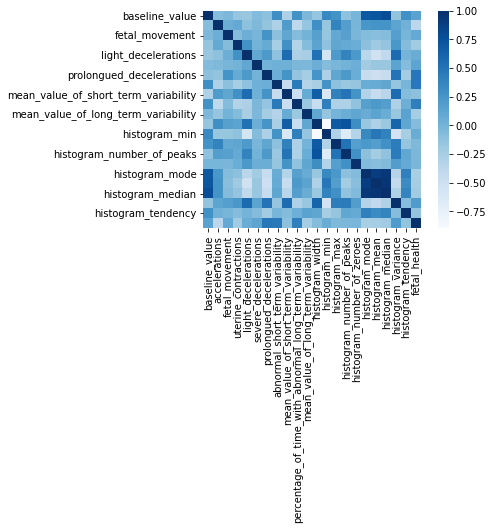

In [11]:
# visualize the correlation matrix.
heatmap = sns.heatmap(corr, square=True, cmap='Blues')

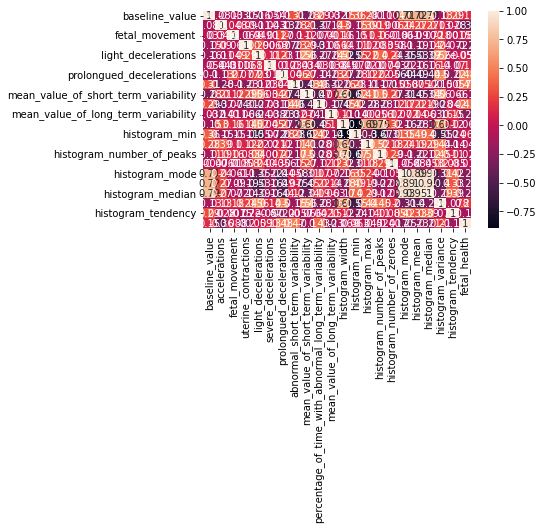

In [12]:
heatmap = sns.heatmap(corr, annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


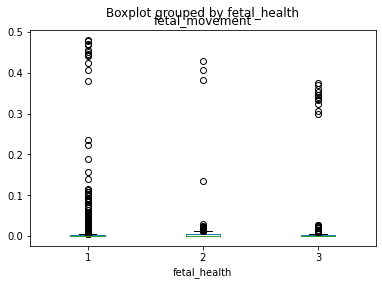

In [13]:
df.boxplot(by ='fetal_health', column =['fetal_movement'], grid = False)

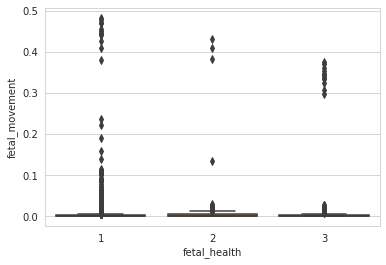

In [14]:
sns.set_style("whitegrid")
sns.boxplot(x = 'fetal_health', y = 'fetal_movement', data = df)

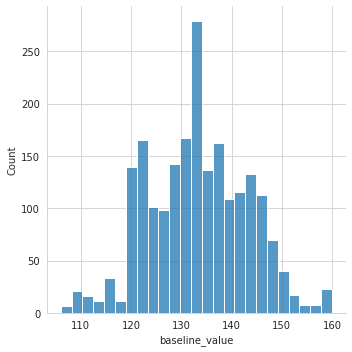

In [15]:
sns.displot(data=df, x='baseline_value')

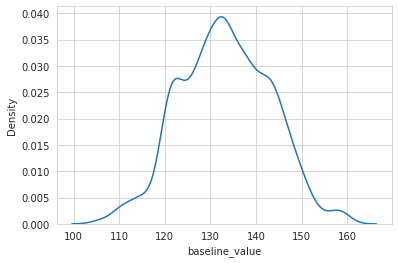

In [16]:
sns.kdeplot(data=df, x='baseline_value')

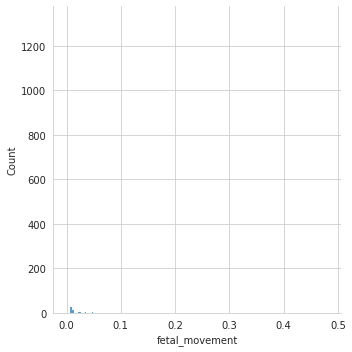

In [17]:
sns.displot(data=df, x='fetal_movement')

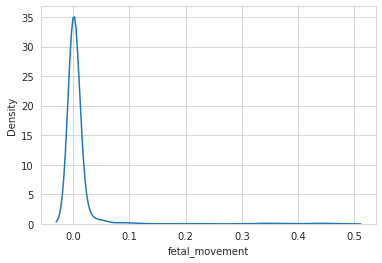

In [18]:
sns.kdeplot(data=df, x='fetal_movement')

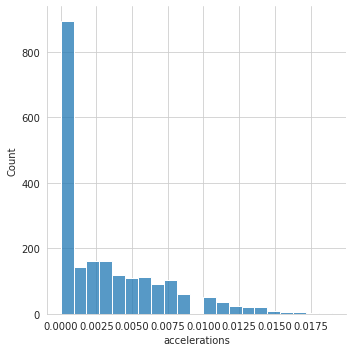

In [19]:
sns.displot(data=df, x='accelerations')

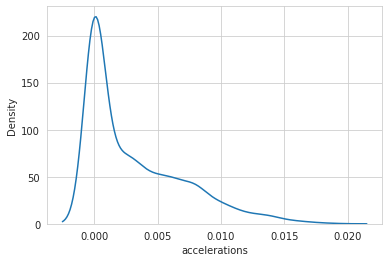

In [20]:
sns.kdeplot(data=df, x='accelerations')

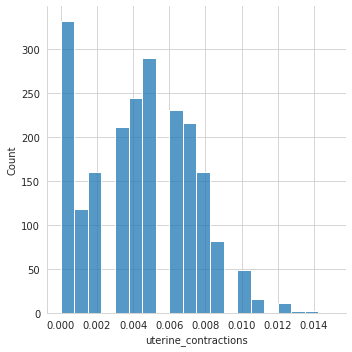

In [21]:
sns.displot(data=df, x='uterine_contractions')

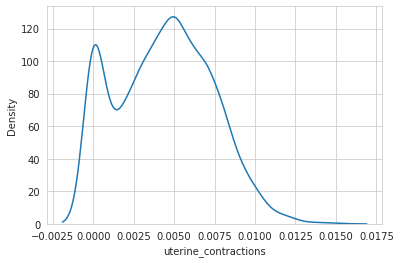

In [22]:
sns.kdeplot(data=df, x='uterine_contractions')

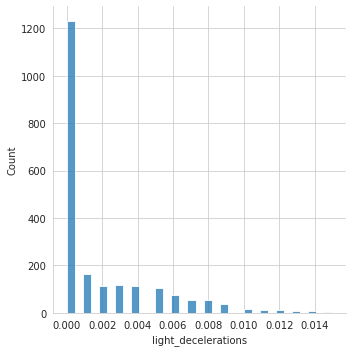

In [23]:
sns.displot(data=df, x='light_decelerations')

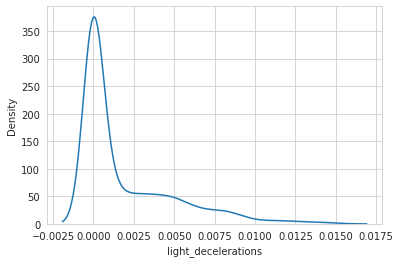

In [24]:
sns.kdeplot(data=df, x='light_decelerations')

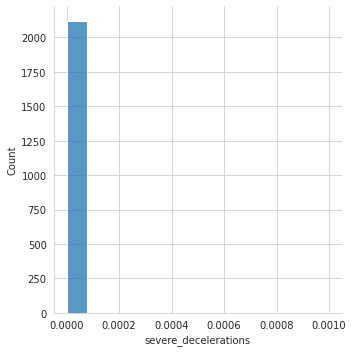

In [25]:
sns.displot(data=df, x='severe_decelerations')

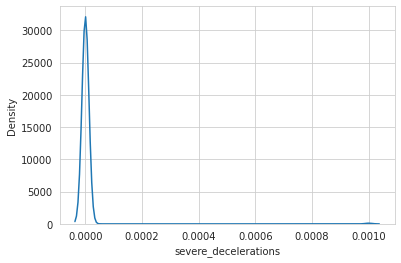

In [26]:
sns.kdeplot(data=df, x='severe_decelerations')

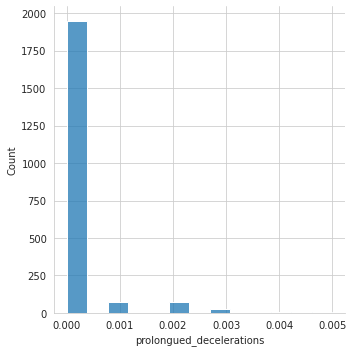

In [27]:
sns.displot(data=df, x='prolongued_decelerations')

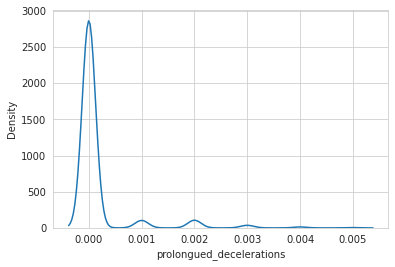

In [28]:
sns.kdeplot(data=df, x='prolongued_decelerations')

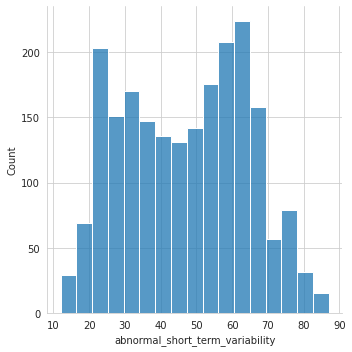

In [29]:
sns.displot(data=df, x='abnormal_short_term_variability')

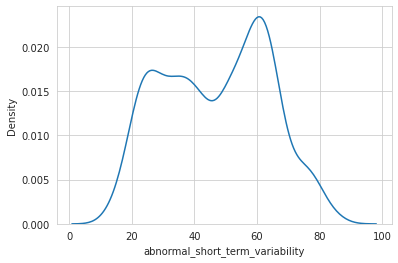

In [30]:
sns.kdeplot(data=df, x='abnormal_short_term_variability')

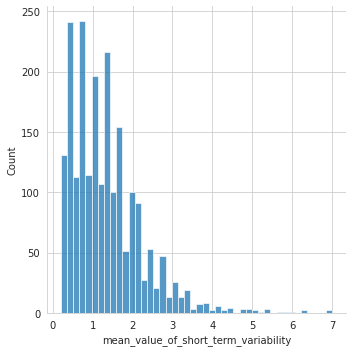

In [31]:
sns.displot(data=df, x='mean_value_of_short_term_variability')

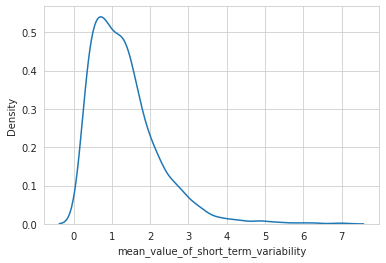

In [32]:
sns.kdeplot(data=df, x='mean_value_of_short_term_variability')

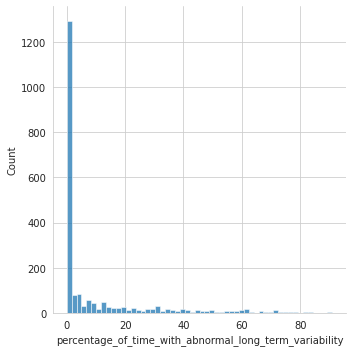

In [33]:
sns.displot(data=df, x='percentage_of_time_with_abnormal_long_term_variability')

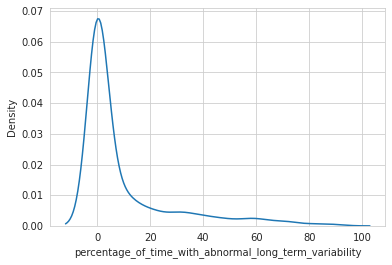

In [34]:
sns.kdeplot(data=df, x='percentage_of_time_with_abnormal_long_term_variability')

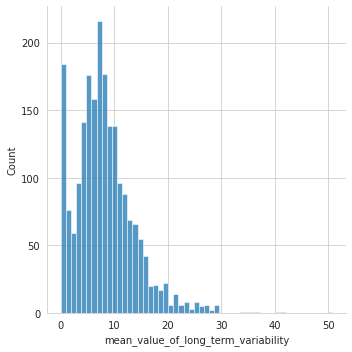

In [35]:
sns.displot(data=df, x='mean_value_of_long_term_variability')

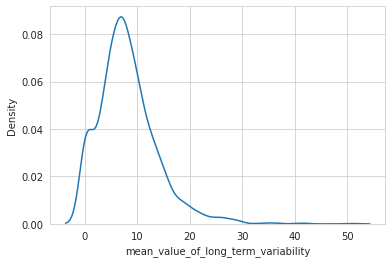

In [36]:
sns.kdeplot(data=df, x='mean_value_of_long_term_variability')

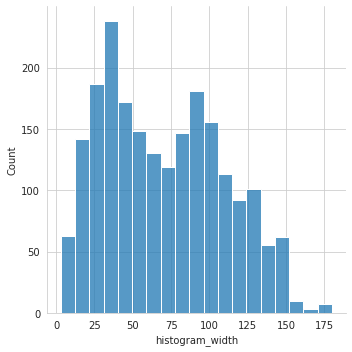

In [37]:
sns.displot(data=df, x='histogram_width')

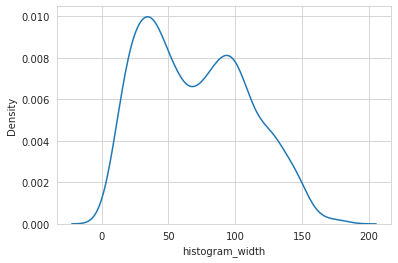

In [38]:
sns.kdeplot(data=df, x='histogram_width')

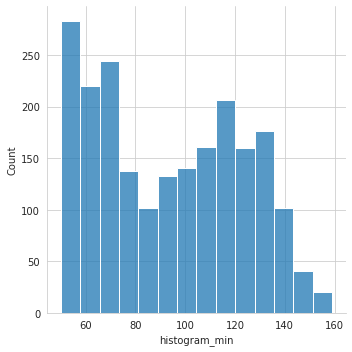

In [39]:
sns.displot(data=df, x='histogram_min')

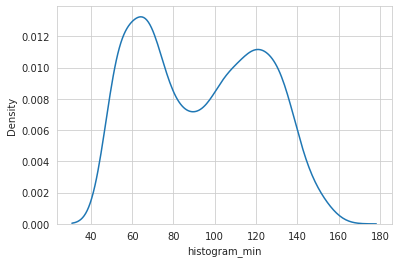

In [40]:
sns.kdeplot(data=df, x='histogram_min')

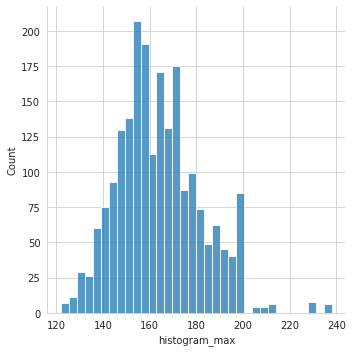

In [41]:
sns.displot(data=df, x='histogram_max')

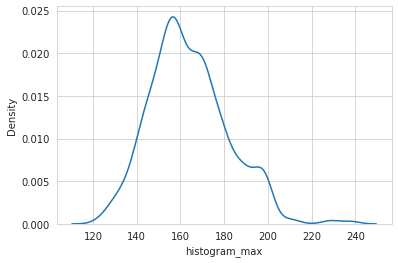

In [42]:
sns.kdeplot(data=df, x='histogram_max')

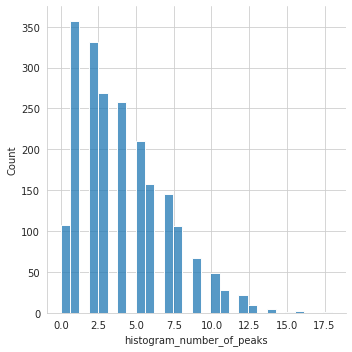

In [43]:
sns.displot(data=df, x='histogram_number_of_peaks')

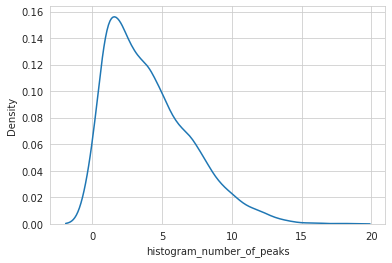

In [44]:
sns.kdeplot(data=df, x='histogram_number_of_peaks')

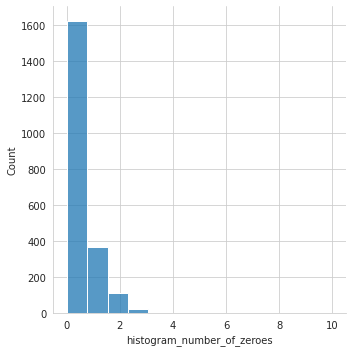

In [45]:
sns.displot(data=df, x='histogram_number_of_zeroes')

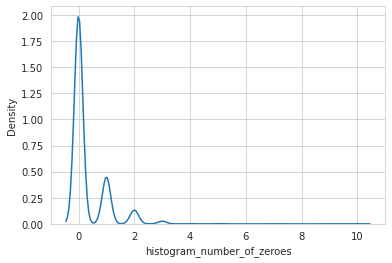

In [46]:
sns.kdeplot(data=df, x='histogram_number_of_zeroes')

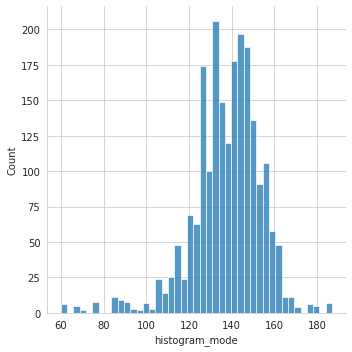

In [47]:
sns.displot(data=df, x='histogram_mode')

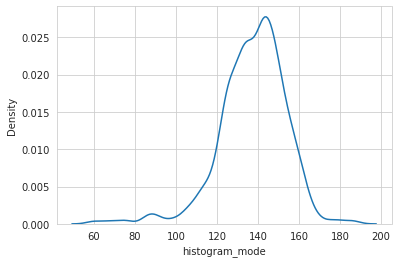

In [48]:
sns.kdeplot(data=df, x='histogram_mode')

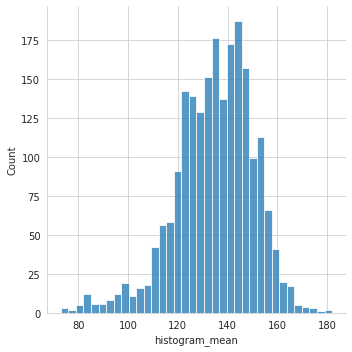

In [49]:
sns.displot(data=df, x='histogram_mean')

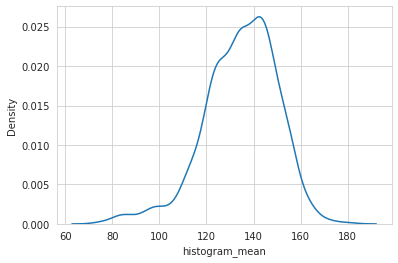

In [50]:
sns.kdeplot(data=df, x='histogram_mean')

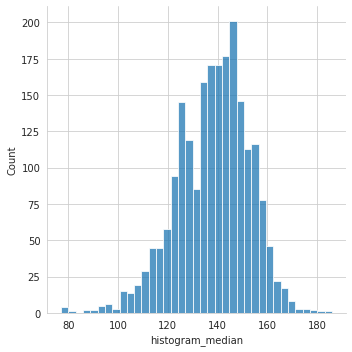

In [51]:
sns.displot(data=df, x='histogram_median')

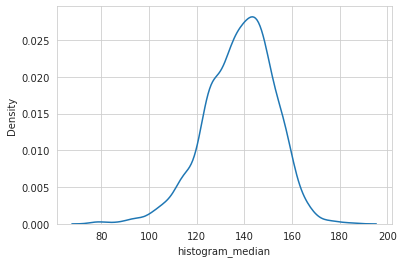

In [52]:
sns.kdeplot(data=df, x='histogram_median')

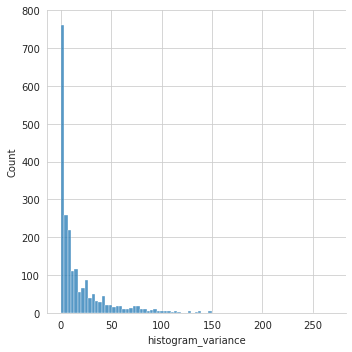

In [53]:
sns.displot(data=df, x='histogram_variance')

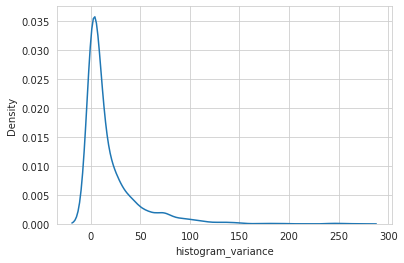

In [54]:
sns.kdeplot(data=df, x='histogram_variance')

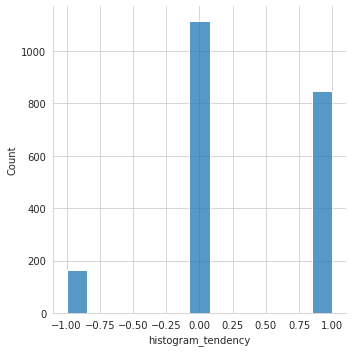

In [55]:
sns.displot(data=df, x='histogram_tendency')

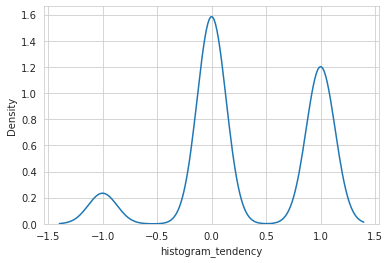

In [56]:
sns.kdeplot(data=df, x='histogram_tendency')

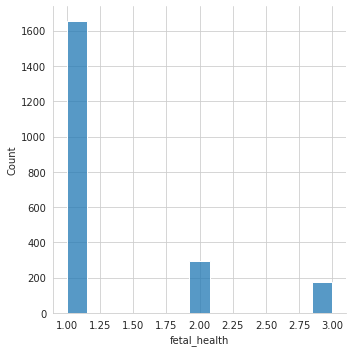

In [57]:
sns.displot(data=df, x='fetal_health')

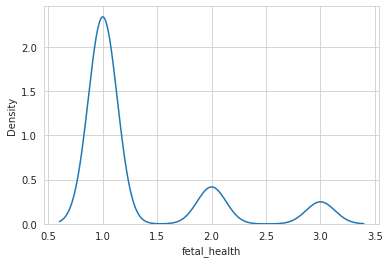

In [58]:
sns.kdeplot(data=df, x='fetal_health')

According to all of the above graphs:
*   The distribution of **baseline_value** column looks likely to be normal.
*   The majority of independent variables are right skewed.

